In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [335]:
data =pd.read_csv("Downloads/LungCapData.csv")

In [336]:
data.head()

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
0,1,6.475,6,62.1,no,male,no
1,2,10.125,18,74.7,yes,female,no
2,3,9.550,16,69.7,no,female,yes
3,4,11.125,14,71.0,no,male,no
4,5,4.800,5,56.9,no,male,no


In [337]:
data.tail()

,Unnamed: 0,LungCap,Age,Height,Smoke,Gender,Caesarean
720,721,5.725,9,56.0,no,female,no
721,722,9.050,18,72.0,yes,male,yes
722,723,3.850,11,60.5,yes,female,no
723,724,9.825,15,64.9,no,female,no
724,725,7.100,10,67.7,no,male,no


In [338]:
data.isnull().sum()

Unnamed: 0    0
LungCap       0
Age           0
Height        0
Smoke         0
Gender        0
Caesarean     0
dtype: int64

In [339]:
data.describe()

,Unnamed: 0,LungCap,Age,Height
count,725.00000,725.000000,725.000000,725.000000
mean,363.00000,7.863148,12.326897,64.836276
std,209.43376,2.662008,4.004750,7.202144
min,1.00000,0.507000,3.000000,45.300000
25%,182.00000,6.150000,9.000000,59.900000
50%,363.00000,8.000000,13.000000,65.400000
75%,544.00000,9.800000,15.000000,70.300000
max,725.00000,14.675000,19.000000,81.800000


Dropping unwanted columns

In [340]:
data_cleaned = data.drop("Unnamed: 0", axis="columns",inplace= False)

In [341]:
data_cleaned.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


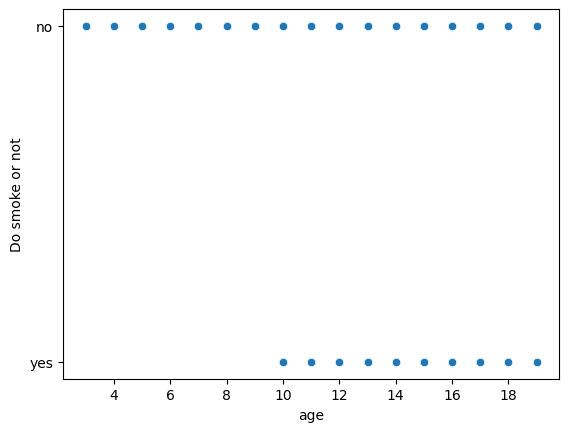

In [342]:
sns.scatterplot(x= "Age",y= "Smoke", data = data_cleaned)

plt.xlabel("age")
plt.ylabel("Do smoke or not")
plt.show()

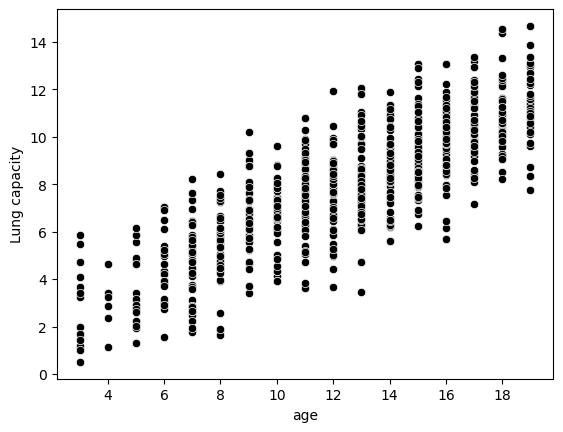

In [343]:
sns.scatterplot(x= "Age",y= "LungCap", data = data_cleaned, c="black")

plt.xlabel("age")
plt.ylabel("Lung capacity")
plt.show()

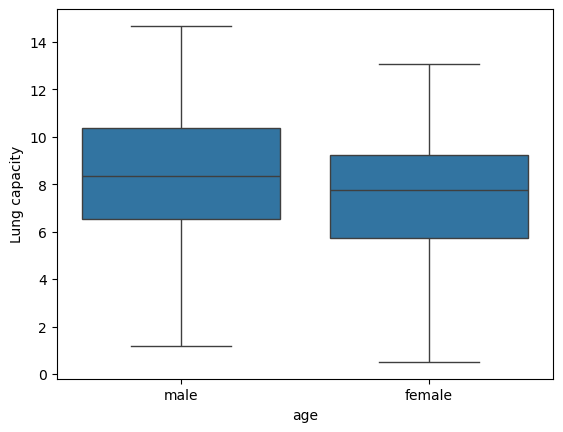

In [344]:
sns.boxplot(x= "Gender",y= "LungCap", data = data_cleaned)

plt.xlabel("age")
plt.ylabel("Lung capacity")
plt.show()

In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae
from sklearn.linear_model import LinearRegression

In [346]:
encoder =OneHotEncoder(sparse_output=False)
categorical_var =["Smoke","Gender","Caesarean"]
encoded_var =encoder.fit_transform(data_cleaned[categorical_var])
encoded_columns = encoder.get_feature_names_out(categorical_var)
encoded_df =pd.DataFrame(encoded_var, columns=encoded_columns)

# Drop original categorical columns and concatenate encoded ones
data_cleaned = pd.concat([data_cleaned.drop(columns=categorical_var).reset_index(drop=True),
                          encoded_df.reset_index(drop=True)], axis=1)
data_cleaned.head()

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6.475,6,62.1,1.0,0.0,0.0,1.0,1.0,0.0
1,10.125,18,74.7,0.0,1.0,1.0,0.0,1.0,0.0
2,9.550,16,69.7,1.0,0.0,1.0,0.0,0.0,1.0
3,11.125,14,71.0,1.0,0.0,0.0,1.0,1.0,0.0
4,4.800,5,56.9,1.0,0.0,0.0,1.0,1.0,0.0


In [347]:
#normalizing the dataset

scaler =MinMaxScaler()
data_cleaned[["Age", "Height"]] =scaler.fit_transform(data_cleaned[["Age","Height"]])

data_cleaned.head()

,LungCap,Age,Height,Smoke_no,Smoke_yes,Gender_female,Gender_male,Caesarean_no,Caesarean_yes
0,6.475,0.1875,0.460274,1.0,0.0,0.0,1.0,1.0,0.0
1,10.125,0.9375,0.805479,0.0,1.0,1.0,0.0,1.0,0.0
2,9.550,0.8125,0.668493,1.0,0.0,1.0,0.0,0.0,1.0
3,11.125,0.6875,0.704110,1.0,0.0,0.0,1.0,1.0,0.0
4,4.800,0.1250,0.317808,1.0,0.0,0.0,1.0,1.0,0.0


In [348]:
x= data_cleaned.drop("LungCap", axis="columns")
y=data_cleaned[["LungCap"]]


X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.20, random_state=42)

In [349]:
X_train.shape

(580, 8)

In [350]:
X_test.shape

(145, 8)

In [351]:
# Applying linear regression

lm =LinearRegression()

lm.fit(X_train,y_train)

pred_lin =lm.predict(X_test)

mse =mse(pred_lin,y_test)
mae =mae(pred_lin,y_test)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")

Mean Squared Error: 1.1345209033979156
Mean absolute Error: 0.8457002224968198


In [442]:
r2_lm = lm.score(X_test,y_test)
lm.score(X_train,y_train)

0.857772819369019

In [444]:
print("R2 value of linear regression", r2_lm)

R2 value of linear regression 0.8381802829214933


In [354]:
# using knn alogrithm:

from sklearn.neighbors import KNeighborsRegressor as knn
kn =knn(n_neighbors= 10)

kn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=10)

In [454]:
pred_knn = kn.predict(X_test)
pred_knn = pd.DataFrame(pred_knn, columns=['Predicted'])  # Optional: name the column
error = pred_knn.values.flatten() - y_test.values.flatten()
r2_knn =kn.score(X_test,y_test)

print("\nPredicted data:\n", pred_knn.head())
print("\nOriginal data:\n", y_test.head())
print("\nDifference between the prediction and original:\n", error[:5])  # first 5 errors

print(f"\nR2 score of KNN algorithm: {kn.score(X_test, y_test)}")



Predicted data:
    Predicted
0     9.8350
1     8.6375
2     8.5050
3     8.0725
4     6.7675

Original data:
      LungCap
326    8.325
518    9.900
554    8.575
33    11.025
375    6.175

Difference between the prediction and original:
 [ 1.51   -1.2625 -0.07   -2.9525  0.5925]

R2 score of KNN algorithm: 0.7975380413318877


In [426]:
# applying random forest regression:

from sklearn.ensemble import RandomForestRegressor 

In [458]:
rf = RandomForestRegressor(n_estimators =30)

rf.fit(X_train,y_train)
pred_rf =rf.predict(X_test)
r2_rf = rf.score(X_test,y_test)
print("\n R2 score of the Random forest regressor is:",rf.score(X_test,y_test))


 R2 score of the Random forest regressor is: 0.7990920322576405


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [466]:
R2_scores= pd.DataFrame({"R2_linear": [r2_lm], "R2_knearest": [r2_knn], "R2_randomforest": [r2_rf]})

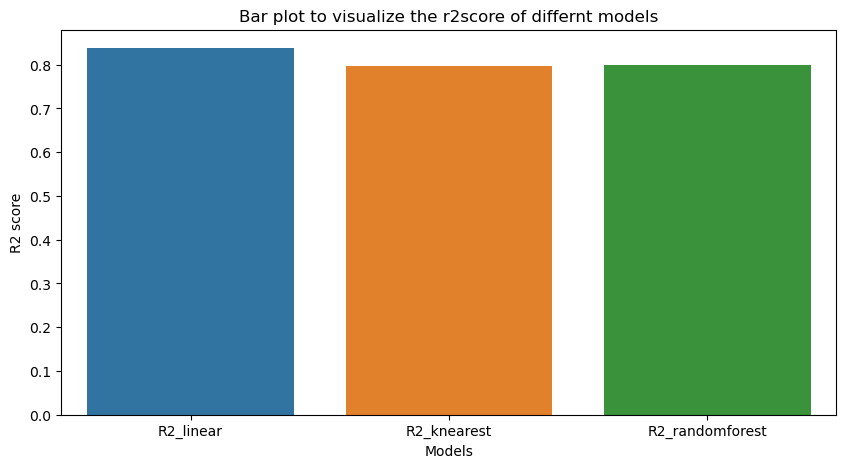

In [490]:
# Create the plot
plt.figure(figsize=(10, 5))

sns.barplot(R2_scores)
plt.ylabel("R2 score")
plt.xlabel("Models")
plt.title("Bar plot to visualize the r2score of differnt models")
plt.show()

# The best algorithm to use for this problem among the three models is Linear Regression